In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [200]:
df = pd.read_csv('bank-loan.csv')

In [201]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0
699,37,1,12,14,44,14.7,2.994684,3.473316,0


In [5]:
# X = df.drop(['default'],axis = 1)

In [6]:
# X

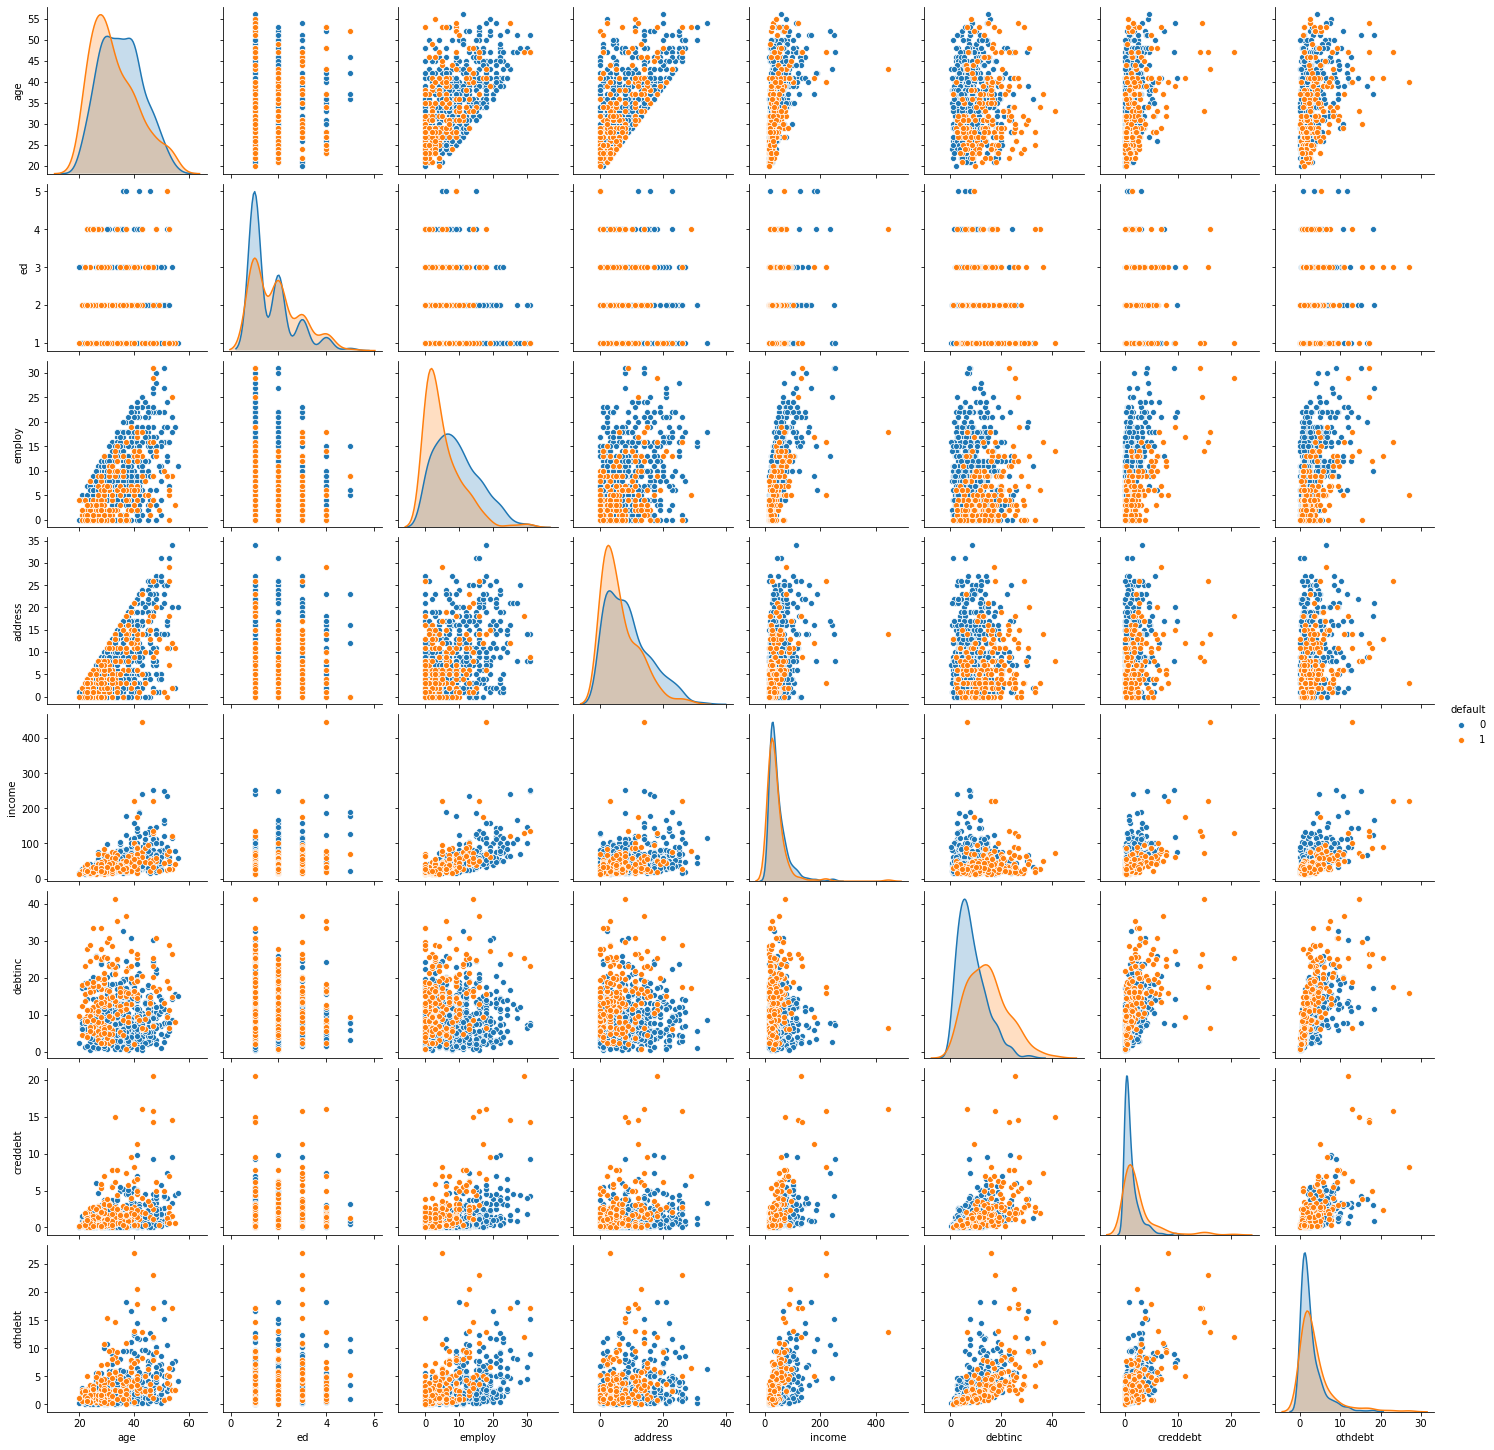

In [7]:
sns.pairplot(df,hue='default')

* There is a obvious classification between all the features , so dropping any feature column will be a bad idea.

In [8]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

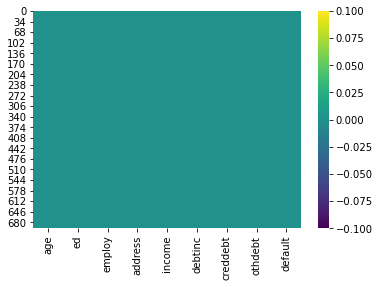

In [9]:
sns.heatmap(df.isnull(),cmap = 'viridis')

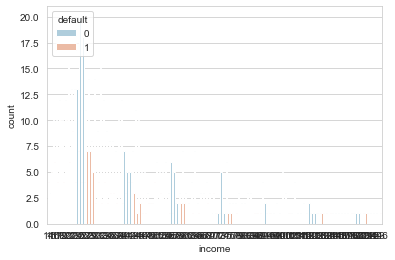

In [10]:
# plt.figsize(12,6)
sns.set_style('whitegrid')
sns.countplot(x='income',data=df,palette='RdBu_r',hue = 'default')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [13]:
# df_scaled = feature_scaling(df.drop(['default'],axis=1))

In [15]:
print(df.head())
# print(df_scaled.head())

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1


In [16]:
# df_scaled.corr()['employ']

In [17]:
df.corr()['employ']

age         0.536497
ed         -0.153621
employ      1.000000
address     0.322334
income      0.619681
debtinc    -0.031182
creddebt    0.403694
othdebt     0.406091
default    -0.282978
Name: employ, dtype: float64

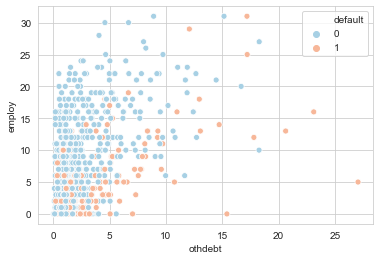

In [18]:
sns.set_style('whitegrid')
sns.scatterplot(x='othdebt',y='employ',data=df,palette='RdBu_r',hue = 'default')

In [19]:
df.drop(['age'],axis = 1)

,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,3,17,12,176,9.3,11.359392,5.008608,1
1,1,10,6,31,17.3,1.362202,4.000798,0
2,1,15,14,55,5.5,0.856075,2.168925,0
3,1,15,14,120,2.9,2.658720,0.821280,0
4,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...
695,2,6,15,27,4.6,0.262062,0.979938,1
696,2,6,4,21,11.5,0.369495,2.045505,0
697,1,15,3,32,7.6,0.491264,1.940736,0
698,1,19,22,77,8.4,2.302608,4.165392,0


In [20]:
# df_scaled['employ'].hist()

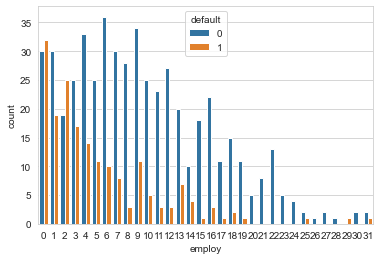

In [21]:
sns.countplot('employ',data = df,hue = 'default')

In [22]:
df.corr()['income']

age         0.478710
ed          0.235190
employ      0.619681
address     0.316245
income      1.000000
debtinc    -0.026777
creddebt    0.570199
othdebt     0.610659
default    -0.070970
Name: income, dtype: float64

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(df_scaled, 
#                                                     df['default'], test_size=0.2, 
#                                                     random_state=101)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('default',axis=1), 
                                                     df['default'], test_size=0.2, 
                                                     random_state=101)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(560, 8)
(560,)
(140, 8)
(140,)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix ,f1_score, accuracy_score
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       100
           1       0.70      0.40      0.51        40

    accuracy                           0.78       140
   macro avg       0.75      0.67      0.68       140
weighted avg       0.77      0.78      0.76       140

[[93  7]
 [24 16]]
0.507936507936508
0.7785714285714286


## Building our Logistic Regression from Scratch

In [119]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



def compute_cost(X,y,theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = (1/m)*(((-y).T.dot(np.log(h+epsilon)))-((1-y).T.dot(np.log(1-h+epsilon))))
    return cost

def gradient_descent(X,y,params,learning_rate,iterations):
    
    m = len(y)
    cost_history = np.zeros((iterations,1))
    
    for i in range(iterations):
        
        params = params - (learning_rate/m) * (X.T.dot(sigmoid(X.dot(params))- y))
        cost_history[i] = compute_cost(X,y,params)
        
    return (cost_history,params)
    

In [95]:
X

array([[46.      ,  3.      ,  3.      , ..., 13.2     ,  3.042336,
         2.633664],
       [33.      ,  1.      ,  6.      , ...,  7.5     ,  0.567   ,
         1.008   ],
       [31.      ,  1.      ,  7.      , ...,  4.9     ,  0.2254  ,
         0.9016  ],
       ...,
       [26.      ,  1.      ,  0.      , ..., 10.5     ,  0.25578 ,
         1.21422 ],
       [39.      ,  1.      , 20.      , ...,  8.2     ,  0.773916,
         2.424084],
       [48.      ,  1.      , 17.      , ...,  3.2     ,  1.46784 ,
         0.64416 ]])

In [120]:
def predict(X,params):
    return np.round(sigmoid(X.dot(params)))

In [142]:
X = X_train.to_numpy()

y = y_train.to_numpy()

y= y.reshape((560,1))

n = np.size(X,1)

params = np.zeros((n,1))

iterations = 100

learning_rate = 0.03

In [143]:
initial_cost = compute_cost(X,y,params)

print(f"Initial Cost is: {initial_cost} \n")

(cost_history,params_optimal) = gradient_descent(X,y,params,learning_rate,iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.12539773]
 [ 0.06448695]
 [-0.84724871]
 [-0.38936695]
 [ 0.06271664]
 [ 0.80635642]
 [ 0.41488149]
 [ 0.15107078]] 



In [144]:
# cost_history

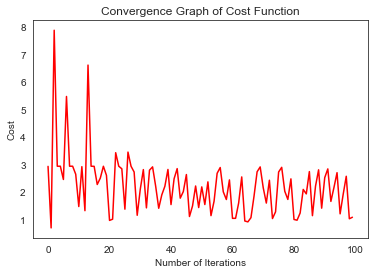

In [145]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)),cost_history,'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [136]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.7446428571428572


In [ ]:
#Quite Close to scikit-learn's Logistic Regression

### Support Vector Machines

In [194]:
from sklearn.svm import SVC

In [195]:
svc = SVC(C=100,kernel='linear',gamma=0.1)

In [196]:
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.1, kernel='linear')

In [197]:
pred_svc = svc.predict(X_test)

In [198]:
print(classification_report(y_test,pred_svc))

print(confusion_matrix(y_test,pred_svc))
print(f1_score(y_test,pred_svc))
print(accuracy_score(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       100
           1       0.72      0.45      0.55        40

    accuracy                           0.79       140
   macro avg       0.76      0.69      0.71       140
weighted avg       0.78      0.79      0.78       140

[[93  7]
 [22 18]]
0.5538461538461539
0.7928571428571428


In [147]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [150]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.741, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.741, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.741, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.741, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.741, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.741, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.741, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.741, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.741, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.741, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.741, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [157]:
grid = grid.best_params_

In [154]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [156]:
print(classification_report(y_test,grid_predictions))

print(confusion_matrix(y_test,grid_predictions))
print(f1_score(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       100
           1       0.87      0.33      0.47        40

    accuracy                           0.79       140
   macro avg       0.83      0.65      0.67       140
weighted avg       0.81      0.79      0.76       140

[[98  2]
 [27 13]]
0.4727272727272728
0.7928571428571428


### Building our Own SVM (linear)

In [188]:
class SVM:
    
    def __init__(self,learning_rate = 0.001 , lambda_param = 0.01, n_iters = 1000,w = 0,b=0):
        
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = w
        self.b = b
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        
        y_ = np.where(y <= 0 ,-1,1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    
                    
    def predict(self,X):
        
        approx = np.dot(X,self.w) - self.b
        return np.sign(approx)

In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(560, 8)
(560,)
(140, 8)
(140,)


In [164]:
X = X_train.to_numpy()
y = y_train.to_numpy()
# y = y.reshape(560,1)

In [168]:
X_t = X_test.to_numpy()
y_t = y_test.to_numpy()
# y_t = y_t.reshape(140,1)

In [166]:
y.shape

(560,)

In [189]:
svm_lin = SVM()

In [190]:
svm_lin.fit(X,y)

In [191]:
pred_lin = svm_lin.predict(X)

In [192]:
score = float(sum(pred_lin == y))/ float(len(y))

In [193]:
score

0.10892857142857143

* Note : this needs improvement

### KNN

In [166]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [167]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler()

In [170]:
scaler.fit(df.drop(['default'],axis=1))

StandardScaler()

In [171]:
scaled_features = scaler.transform(df.drop('default',axis=1))

In [172]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,0.768304,1.376911,1.294313,0.545664,3.544603,-0.140798,4.634831,0.593692
1,-0.983529,-0.779325,0.242201,-0.334101,-0.396908,1.031818,-0.090444,0.286919
2,0.643173,-0.779325,0.993709,0.838919,0.255480,-0.697790,-0.329670,-0.270693
3,0.768304,-0.779325,0.993709,0.838919,2.022364,-1.078890,0.522369,-0.680910
4,-1.358922,0.298793,-0.960214,-1.213867,-0.478457,1.031818,0.110547,-0.000501


In [174]:
# sns.pairplot(df_feat)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['default'],
                                                    test_size=0.30)

In [182]:
knn = KNeighborsClassifier(n_neighbors=1)

In [183]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [184]:
pred_knn = knn.predict(X_test)

In [185]:
print(classification_report(y_test,pred_knn))

print(confusion_matrix(y_test,pred_knn))
print(f1_score(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       149
           1       0.48      0.38      0.42        61

    accuracy                           0.70       210
   macro avg       0.62      0.60      0.61       210
weighted avg       0.68      0.70      0.69       210

[[124  25]
 [ 38  23]]
0.4220183486238532
0.7


In [192]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

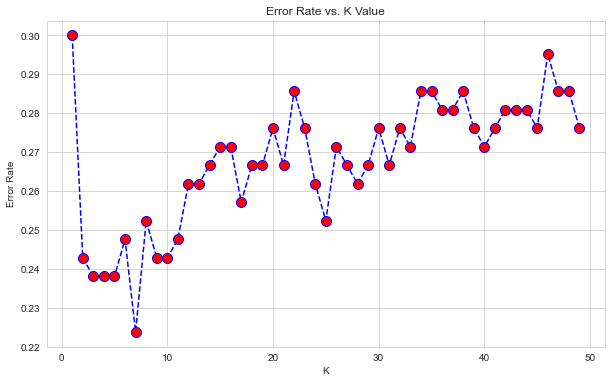

In [193]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [202]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=7


[[94  6]
 [27 13]]


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       100
           1       0.68      0.33      0.44        40

    accuracy                           0.76       140
   macro avg       0.73      0.63      0.65       140
weighted avg       0.75      0.76      0.73       140



0.7642857142857142


### Random Forest Classifier

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('default',axis=1), 
                                                     df['default'], test_size=0.2, 
                                                     random_state=101)

In [203]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [204]:
rfc_pred = rfc.predict(X_test)

In [205]:
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print(accuracy_score(y_test,rfc_pred))



[[96  4]
 [21 19]]


              precision    recall  f1-score   support

           0       0.82      0.96      0.88       100
           1       0.83      0.47      0.60        40

    accuracy                           0.82       140
   macro avg       0.82      0.72      0.74       140
weighted avg       0.82      0.82      0.80       140



0.8214285714285714


### Neural Networks

In [204]:
import tensorflow as tf

In [205]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [206]:
model = tf.keras.models.Sequential()

In [228]:
# model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(64,activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(32,activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(16,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(8,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation = tf.nn.relu))

In [229]:
model.add(tf.keras.layers.Dense(2,activation = tf.nn.softmax)) #output layer

In [230]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [231]:
model.fit(X_train,y_train,epochs=3,verbose=2)

Epoch 1/3
18/18 - 0s - loss: 0.6920 - accuracy: 0.5304
Epoch 2/3
18/18 - 0s - loss: 0.6817 - accuracy: 0.7446
Epoch 3/3
18/18 - 0s - loss: 0.6743 - accuracy: 0.7446


### XGBoost

In [237]:
import xgboost
import datetime

In [241]:
eval_set=[(X_test, y_test)]

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

In [242]:
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.71937
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.72988
[2]	validation_0-auc:0.73137
[3]	validation_0-auc:0.73062
[4]	validation_0-auc:0.76462
[5]	validation_0-auc:0.77550
[6]	validation_0-auc:0.77475
[7]	validation_0-auc:0.78300
[8]	validation_0-auc:0.78250
[9]	validation_0-auc:0.77812
[10]	validation_0-auc:0.78138
[11]	validation_0-auc:0.78038
[12]	validation_0-auc:0.78287
[13]	validation_0-auc:0.78638
[14]	validation_0-auc:0.78625
[15]	validation_0-auc:0.78625
[16]	validation_0-auc:0.78425
[17]	validation_0-auc:0.78725
[18]	validation_0-auc:0.79050
[19]	validation_0-auc:0.78563
[20]	validation_0-auc:0.78612
[21]	validation_0-auc:0.78612
[22]	validation_0-auc:0.79038
[23]	validation_0-auc:0.79150
[24]	validation_0-auc:0.79025
[25]	validation_0-auc:0.79150
[26]	validation_0-auc:0.79075
[27]	validation_0-auc:0.79175
[28]	validation_0-auc:0.79225
[29]	validation_0-auc:0.79500
[30]	validation_0-auc:0.79475
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              random_state=9616, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=9616, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [243]:
xgb_pred = clf.predict(X_test)

In [244]:
print('\n')
print(confusion_matrix(y_test,xgb_pred))
print('\n')
print(classification_report(y_test,xgb_pred))
print('\n')
print(accuracy_score(y_test,xgb_pred))



[[96  4]
 [23 17]]


              precision    recall  f1-score   support

           0       0.81      0.96      0.88       100
           1       0.81      0.42      0.56        40

    accuracy                           0.81       140
   macro avg       0.81      0.69      0.72       140
weighted avg       0.81      0.81      0.79       140



0.8071428571428572


### The RFC classifier gave the best accuracy score , so we will output the results of test file through our RFC classifier

In [206]:
test_df = pd.read_csv("test.csv")

In [207]:
test_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [208]:
X = test_df.drop(["default"],axis = 1)

In [210]:
y = test_df["default"]

In [213]:
rfc_pred = rfc.predict(X)

In [234]:
y_result = pd.DataFrame(data=rfc_pred,columns=['default'])
X_result = pd.DataFrame(data = X)

* Concatenating the final X and y dataframes.

In [235]:
result = pd.concat([X_result,y_result], axis=1)

* storing the results in test.csv file

In [236]:
result

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,36,1,16,13,32,10.9,0.544128,2.943872,0
1,50,1,6,27,21,12.9,1.316574,1.392426,0
2,40,1,9,9,33,17.0,4.880700,0.729300,0
3,31,1,5,7,23,2.0,0.046000,0.414000,0
4,29,1,4,0,24,7.8,0.866736,1.005264,0
...,...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672,0
146,32,2,12,11,116,5.7,4.026708,2.585292,0
147,48,1,13,11,38,10.8,0.722304,3.381696,0
148,35,2,1,11,24,7.8,0.417456,1.454544,0


In [237]:
result.to_csv("test.csv")